In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import matplotlib.pyplot as plt

In [5]:
# Carregar o CSV
file_path = '/Users/usuario1/Desktop/P_ia/SP500-Prediction-Dimmy/data/sp500.csv'
data = pd.read_csv(file_path)


In [6]:
# Processamento dos dados
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')
data['SP500_shifted'] = data['SP500'].shift(-1)
data.dropna(inplace=True)

In [7]:
# Criar variáveis preditoras (features) e alvo (target)
X = data[['SP500']]
y = data['SP500_shifted']

In [8]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [11]:
# Definir a grade de hiperparâmetros para pesquisa
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

In [12]:
# Configurar a pesquisa aleatória
random_search = RandomizedSearchCV(
    regressor, param_distributions, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1
)

In [13]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
143 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x303936db0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x303934d10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x303934e90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x303936930>},
                   random_state=42, verbose=1)

In [14]:
best_model = random_search.best_estimator_

In [ ]:
# Treinamento do modelo de regressão com registro de loss
losses = []
n_estimators_range = range(10, 201, 10)  # Testando de 10 a 200 árvores, em passos de 10

for n_estimators in n_estimators_range:
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    losses.append(loss)


In [ ]:
# Plotar o gráfico do loss
plt.figure(figsize=(14, 7))
plt.plot(n_estimators_range, losses, marker='o', linestyle='-')
plt.title('Loss (MSE) durante o Treinamento')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

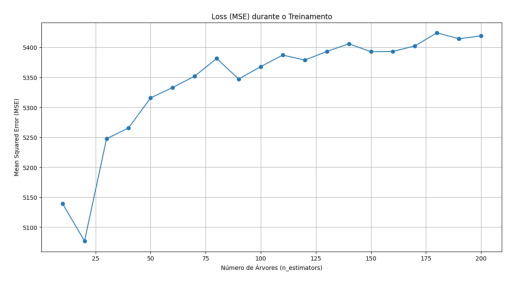

In [2]:
img = plt.imread(r'C:\Users\ednaldo\Desktop\SP500-Prediction-Dimmy\plots\RandomForest\plotrandomforest1.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [ ]:
# Previsões no conjunto de teste usando o melhor modelo
y_pred_best = best_model.predict(X_test)

In [ ]:
# Calculando as métricas para o melhor modelo
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

In [ ]:
# Exibindo as métricas em um DataFrame
metrics_best_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Score': [mae_best, mse_best, rmse_best, r2_best]
})

print(metrics_best_df)

  Metric        Score
0    MAE    48.480785
1    MSE  3819.253317
2   RMSE    61.800108
3     R²     0.980445

In [ ]:
# Reajustando as previsões para correspondência correta
y_pred_best_series = pd.Series(y_pred_best, index=X_test.index).sort_index()
y_test_sorted = y_test.loc[X_test.index].sort_index()

In [ ]:
# Plotando os valores reais e as previsões do melhor modelo
plt.figure(figsize=(14, 7))
plt.plot(y_test_sorted.index, y_test_sorted, label='Valores Reais', color='blue')
plt.plot(y_pred_best_series.index, y_pred_best_series, label='Previsões', color='orange')
plt.legend()
plt.title('Previsões vs Valores Reais - Valores do S&P 500 (Modelo Otimizado)')
plt.xlabel('Data')
plt.ylabel('Valor do S&P 500')
plt.grid(True)
plt.show()

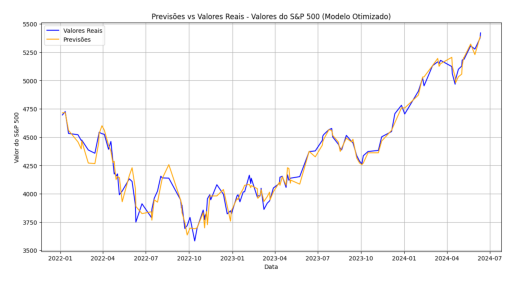

In [3]:
img = plt.imread(r'C:\Users\ednaldo\Desktop\SP500-Prediction-Dimmy\plots\RandomForest\plotrandomforest2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()